# K-Mode Clustering on Hotel Mapping  Dataset

K-mode clustering is an unsupervised machine-learning technique used to group a set of data objects into a specified number of clusters, based on their categorical attributes. The algorithm is called “K-Mode” because it uses modes (i.e. the most frequent values) instead of means or medians to represent the clusters.

# 1.Read and Explore the dataset

In [51]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
VTech=pd.read_csv('sample-room-data_recreated.csv', encoding= 'unicode_escape', sep=",",skiprows=0, low_memory=False)
VTech.head()

,VervotechId,HotelName,Provider,ProviderHotelId,ProviderRoomCode,ProviderRoomName,ProviderBedInfo,ProviderAttributesInfo,ProviderViewInfo
0,39688211,Bellagio,BookingCom,186104.0,18610405.0,Bellagio Suite,King bed(s),RoomSize=94.76 squaremeter,NaN
1,39688211,Bellagio,EAN,140596.0,201646682.0,Bellagio Suite,King,RoomSize=1020 squarefeet,NaN
2,39688211,Bellagio,Priceline,700076943.0,900316366.0,Bellagio Suite,KING,RoomSize=1020 squarefeet|HasSofaBed=Yes,NaN
3,39688211,Bellagio,EAN,140596.0,212405074.0,Two Bedroom Bellagio Suite,2King,RoomSize=1530 squarefeet|SmokingAllowed=NotAll...,NaN
4,39688211,Bellagio,BookingCom,186104.0,18610427.0,Bellagio Two Queen Suite,2Queen bed(s),RoomSize=94.76 squaremeter,NaN


In [53]:
VTech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39692 entries, 0 to 39691
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VervotechId             39692 non-null  object 
 1   HotelName               39692 non-null  object 
 2   Provider                39690 non-null  object 
 3   ProviderHotelId         39690 non-null  float64
 4   ProviderRoomCode        39690 non-null  float64
 5   ProviderRoomName        39690 non-null  object 
 6   ProviderBedInfo         36391 non-null  object 
 7   ProviderAttributesInfo  39625 non-null  object 
 8   ProviderViewInfo        3996 non-null   object 
dtypes: float64(2), object(7)
memory usage: 2.7+ MB


In [54]:
VTech.describe()

,ProviderHotelId,ProviderRoomCode
count,3.969000e+04,3.969000e+04
mean,2.077902e+08,3.602785e+08
std,3.176684e+08,3.632262e+08
min,9.900000e+01,1.290000e+02
25%,9.569700e+04,3.104382e+07
50%,1.208242e+06,2.020710e+08
75%,7.000233e+08,9.000980e+08
max,7.051761e+08,9.053906e+08


In [55]:
VTech.columns

Index(['VervotechId', 'HotelName', 'Provider', 'ProviderHotelId',
       'ProviderRoomCode', 'ProviderRoomName', 'ProviderBedInfo',
       'ProviderAttributesInfo', 'ProviderViewInfo'],
      dtype='object')

In [56]:
type(VTech)

pandas.core.frame.DataFrame

# 2. Data cleaning 

In [57]:
VTech.head()

,VervotechId,HotelName,Provider,ProviderHotelId,ProviderRoomCode,ProviderRoomName,ProviderBedInfo,ProviderAttributesInfo,ProviderViewInfo
0,39688211,Bellagio,BookingCom,186104.0,18610405.0,Bellagio Suite,King bed(s),RoomSize=94.76 squaremeter,NaN
1,39688211,Bellagio,EAN,140596.0,201646682.0,Bellagio Suite,King,RoomSize=1020 squarefeet,NaN
2,39688211,Bellagio,Priceline,700076943.0,900316366.0,Bellagio Suite,KING,RoomSize=1020 squarefeet|HasSofaBed=Yes,NaN
3,39688211,Bellagio,EAN,140596.0,212405074.0,Two Bedroom Bellagio Suite,2King,RoomSize=1530 squarefeet|SmokingAllowed=NotAll...,NaN
4,39688211,Bellagio,BookingCom,186104.0,18610427.0,Bellagio Two Queen Suite,2Queen bed(s),RoomSize=94.76 squaremeter,NaN


2.1 Fixing the rows and columns

In [58]:
VTech["Smoking"] = VTech["ProviderAttributesInfo"].str.extract("(SmokingAllowed=NotAllowed|SmokingAllowed=Allowed)")[0]

In [59]:
VTech["Balcony"] = VTech["ProviderAttributesInfo"].str.extract("(HasBalcony=Yes|HasBalcony=No)")[0]

In [60]:
VTech["Kitchen"] = VTech["ProviderAttributesInfo"].str.extract("(HasKitchen=Yes|HasKitchen=No)")[0]

In [61]:
VTech["SofaBed"] = VTech["ProviderAttributesInfo"].str.extract("(HasSofaBed=Yes|HasSofaBed=No)")[0]

In [62]:
VTech["RoomSize"] = VTech["ProviderAttributesInfo"].str.extractall("(\d*\.?\d+)").unstack().fillna('').sum(axis=1).astype(float)

In [63]:
VTech["RoomArea"] = VTech["ProviderAttributesInfo"].str.extract("(squaremeter|squarefeet)")[0]

In [64]:
VTech["RoomSizeArea"] = VTech['RoomSize'].apply(str) +" "+ VTech["RoomArea"]

In [65]:
VTech.head()

,VervotechId,HotelName,Provider,ProviderHotelId,ProviderRoomCode,ProviderRoomName,ProviderBedInfo,ProviderAttributesInfo,ProviderViewInfo,Smoking,Balcony,Kitchen,SofaBed,RoomSize,RoomArea,RoomSizeArea
0,39688211,Bellagio,BookingCom,186104.0,18610405.0,Bellagio Suite,King bed(s),RoomSize=94.76 squaremeter,NaN,NaN,NaN,NaN,NaN,94.76,squaremeter,94.76 squaremeter
1,39688211,Bellagio,EAN,140596.0,201646682.0,Bellagio Suite,King,RoomSize=1020 squarefeet,NaN,NaN,NaN,NaN,NaN,1020.00,squarefeet,1020.0 squarefeet
2,39688211,Bellagio,Priceline,700076943.0,900316366.0,Bellagio Suite,KING,RoomSize=1020 squarefeet|HasSofaBed=Yes,NaN,NaN,NaN,NaN,HasSofaBed=Yes,1020.00,squarefeet,1020.0 squarefeet
3,39688211,Bellagio,EAN,140596.0,212405074.0,Two Bedroom Bellagio Suite,2King,RoomSize=1530 squarefeet|SmokingAllowed=NotAll...,NaN,SmokingAllowed=NotAllowed,NaN,NaN,NaN,1530.00,squarefeet,1530.0 squarefeet
4,39688211,Bellagio,BookingCom,186104.0,18610427.0,Bellagio Two Queen Suite,2Queen bed(s),RoomSize=94.76 squaremeter,NaN,NaN,NaN,NaN,NaN,94.76,squaremeter,94.76 squaremeter


2.2 convert all squaremeter units in squarefeet of RoomSizeArea

In [66]:
VTech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39692 entries, 0 to 39691
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VervotechId             39692 non-null  object 
 1   HotelName               39692 non-null  object 
 2   Provider                39690 non-null  object 
 3   ProviderHotelId         39690 non-null  float64
 4   ProviderRoomCode        39690 non-null  float64
 5   ProviderRoomName        39690 non-null  object 
 6   ProviderBedInfo         36391 non-null  object 
 7   ProviderAttributesInfo  39625 non-null  object 
 8   ProviderViewInfo        3996 non-null   object 
 9   Smoking                 13812 non-null  object 
 10  Balcony                 3350 non-null   object 
 11  Kitchen                 1715 non-null   object 
 12  SofaBed                 7286 non-null   object 
 13  RoomSize                35180 non-null  float64
 14  RoomArea                35177 non-null

In [67]:
VTech['RoomSize'] = VTech['RoomSize'].astype(float)

In [68]:
VTech['RoomInSquareFeet'] = np.where((VTech['RoomArea'] == "squaremeter"), VTech['RoomSize'] * 10.7639, VTech['RoomSize'])

In [69]:
VTech.head()

,VervotechId,HotelName,Provider,ProviderHotelId,ProviderRoomCode,ProviderRoomName,ProviderBedInfo,ProviderAttributesInfo,ProviderViewInfo,Smoking,Balcony,Kitchen,SofaBed,RoomSize,RoomArea,RoomSizeArea,RoomInSquareFeet
0,39688211,Bellagio,BookingCom,186104.0,18610405.0,Bellagio Suite,King bed(s),RoomSize=94.76 squaremeter,NaN,NaN,NaN,NaN,NaN,94.76,squaremeter,94.76 squaremeter,1019.987164
1,39688211,Bellagio,EAN,140596.0,201646682.0,Bellagio Suite,King,RoomSize=1020 squarefeet,NaN,NaN,NaN,NaN,NaN,1020.00,squarefeet,1020.0 squarefeet,1020.000000
2,39688211,Bellagio,Priceline,700076943.0,900316366.0,Bellagio Suite,KING,RoomSize=1020 squarefeet|HasSofaBed=Yes,NaN,NaN,NaN,NaN,HasSofaBed=Yes,1020.00,squarefeet,1020.0 squarefeet,1020.000000
3,39688211,Bellagio,EAN,140596.0,212405074.0,Two Bedroom Bellagio Suite,2King,RoomSize=1530 squarefeet|SmokingAllowed=NotAll...,NaN,SmokingAllowed=NotAllowed,NaN,NaN,NaN,1530.00,squarefeet,1530.0 squarefeet,1530.000000
4,39688211,Bellagio,BookingCom,186104.0,18610427.0,Bellagio Two Queen Suite,2Queen bed(s),RoomSize=94.76 squaremeter,NaN,NaN,NaN,NaN,NaN,94.76,squaremeter,94.76 squaremeter,1019.987164


In [70]:
VTech.shape

(39692, 17)

2.3 lets drop the splitted columns

In [71]:
VTech1=VTech.drop("ProviderAttributesInfo", axis='columns')

In [72]:
VTech2=VTech1.drop("RoomSize", axis='columns')

In [73]:
VTech3=VTech2.drop("RoomArea",axis='columns')

In [74]:
VTech4=VTech3.drop("RoomSizeArea",axis='columns')

In [75]:
VTech4.head()

,VervotechId,HotelName,Provider,ProviderHotelId,ProviderRoomCode,ProviderRoomName,ProviderBedInfo,ProviderViewInfo,Smoking,Balcony,Kitchen,SofaBed,RoomInSquareFeet
0,39688211,Bellagio,BookingCom,186104.0,18610405.0,Bellagio Suite,King bed(s),NaN,NaN,NaN,NaN,NaN,1019.987164
1,39688211,Bellagio,EAN,140596.0,201646682.0,Bellagio Suite,King,NaN,NaN,NaN,NaN,NaN,1020.000000
2,39688211,Bellagio,Priceline,700076943.0,900316366.0,Bellagio Suite,KING,NaN,NaN,NaN,NaN,HasSofaBed=Yes,1020.000000
3,39688211,Bellagio,EAN,140596.0,212405074.0,Two Bedroom Bellagio Suite,2King,NaN,SmokingAllowed=NotAllowed,NaN,NaN,NaN,1530.000000
4,39688211,Bellagio,BookingCom,186104.0,18610427.0,Bellagio Two Queen Suite,2Queen bed(s),NaN,NaN,NaN,NaN,NaN,1019.987164


In [76]:
VTech4.shape

(39692, 13)

2.4 Treat missing values 

In [77]:
VTech4.isnull().sum()

VervotechId             0
HotelName               0
Provider                2
ProviderHotelId         2
ProviderRoomCode        2
ProviderRoomName        2
ProviderBedInfo      3301
ProviderViewInfo    35696
Smoking             25880
Balcony             36342
Kitchen             37977
SofaBed             32406
RoomInSquareFeet     4512
dtype: int64

In [78]:
VTech4.isnull().mean()

VervotechId         0.000000
HotelName           0.000000
Provider            0.000050
ProviderHotelId     0.000050
ProviderRoomCode    0.000050
ProviderRoomName    0.000050
ProviderBedInfo     0.083165
ProviderViewInfo    0.899325
Smoking             0.652021
Balcony             0.915600
Kitchen             0.956792
SofaBed             0.816437
RoomInSquareFeet    0.113675
dtype: float64

In [79]:
VTech4.shape

(39692, 13)

2.5 ProviderBedInfo is  having  0.083165 lets drop missing records in ProviderBedInfo

In [80]:
#drop records with ProviderBedInfo missing
VTech5=VTech4[~VTech4.ProviderBedInfo.isnull()].copy()


In [81]:
VTech5.shape 

(36391, 13)

In [82]:
VTech5.ProviderBedInfo.isnull().sum()

0

2.6 RoomInSquareFeet  is having 0.11 missing valus lets lets drop records

In [83]:
VTech6=VTech5[~VTech5.RoomInSquareFeet.isnull()].copy()


In [84]:
VTech6.RoomInSquareFeet.isnull().sum()

0

In [85]:
VTech6.shape

(31889, 13)

2.7 In our dataset ProviderViewInfo,Smoking,Balcony,Kitchen ,SofaBed are columns having more than 60% missing values and it is irrelevant in our analysis lets drop them

In [86]:
VTech7=VTech6.drop(VTech6.columns[VTech6.isnull().mean()>0.65],axis=1)

In [87]:
VTech7.head()

,VervotechId,HotelName,Provider,ProviderHotelId,ProviderRoomCode,ProviderRoomName,ProviderBedInfo,RoomInSquareFeet
0,39688211,Bellagio,BookingCom,186104.0,18610405.0,Bellagio Suite,King bed(s),1019.987164
1,39688211,Bellagio,EAN,140596.0,201646682.0,Bellagio Suite,King,1020.000000
2,39688211,Bellagio,Priceline,700076943.0,900316366.0,Bellagio Suite,KING,1020.000000
3,39688211,Bellagio,EAN,140596.0,212405074.0,Two Bedroom Bellagio Suite,2King,1530.000000
4,39688211,Bellagio,BookingCom,186104.0,18610427.0,Bellagio Two Queen Suite,2Queen bed(s),1019.987164


In [88]:
VTech7.shape

(31889, 8)

In [89]:
VTech7.describe()

,ProviderHotelId,ProviderRoomCode,RoomInSquareFeet
count,3.188900e+04,3.188900e+04,31889.000000
mean,2.433139e+08,3.957297e+08,428.930556
std,3.315932e+08,3.794246e+08,583.133175
min,9.900000e+01,1.290000e+02,0.000000
25%,1.811880e+05,3.159300e+07,289.000000
50%,1.779025e+06,2.070131e+08,340.031601
75%,7.000478e+08,9.001985e+08,451.000000
max,7.051761e+08,9.053906e+08,26910.000000


In [90]:
VTech7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31889 entries, 0 to 39691
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   VervotechId       31889 non-null  object 
 1   HotelName         31889 non-null  object 
 2   Provider          31889 non-null  object 
 3   ProviderHotelId   31889 non-null  float64
 4   ProviderRoomCode  31889 non-null  float64
 5   ProviderRoomName  31889 non-null  object 
 6   ProviderBedInfo   31889 non-null  object 
 7   RoomInSquareFeet  31889 non-null  float64
dtypes: float64(3), object(5)
memory usage: 2.2+ MB


In [91]:
VTech7.isnull().sum()

VervotechId         0
HotelName           0
Provider            0
ProviderHotelId     0
ProviderRoomCode    0
ProviderRoomName    0
ProviderBedInfo     0
RoomInSquareFeet    0
dtype: int64

# 3 Prepare data for model building

 Check the DATATYPE of column 

In [92]:
VTech7=VTech7.astype({"ProviderHotelId": 'str', "ProviderRoomCode": 'str',"RoomInSquareFeet": 'str'})
VTech7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31889 entries, 0 to 39691
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   VervotechId       31889 non-null  object
 1   HotelName         31889 non-null  object
 2   Provider          31889 non-null  object
 3   ProviderHotelId   31889 non-null  object
 4   ProviderRoomCode  31889 non-null  object
 5   ProviderRoomName  31889 non-null  object
 6   ProviderBedInfo   31889 non-null  object
 7   RoomInSquareFeet  31889 non-null  object
dtypes: object(8)
memory usage: 2.2+ MB


In [105]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
VTech8=VTech7.apply(le.fit_transform)
VTech8.head()

,Cluster,VervotechId,HotelName,Provider,ProviderHotelId,ProviderRoomCode,ProviderRoomName,ProviderBedInfo,RoomInSquareFeet
0,0,1285,73,0,581,2096,630,262,23
1,2,1285,73,1,228,5921,630,261,24
2,1,1285,73,2,2747,24671,630,217,24
3,2,1285,73,1,228,8410,10471,41,321
4,0,1285,73,0,581,2102,631,68,23


In [94]:
pip install kmodes

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [95]:
from kmodes.kmodes import KModes
import warnings
warnings.filterwarnings("ignore") 

# 4 Elbow curve to find optimal K

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 256872.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 256872.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 256872.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 256872.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 256872.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10689, cost: 230286.0
Run 1, iteration: 2/100, moves: 495, cost: 230284.0
Run 1, iteration: 3/100, moves: 0, cost: 230284.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, itera

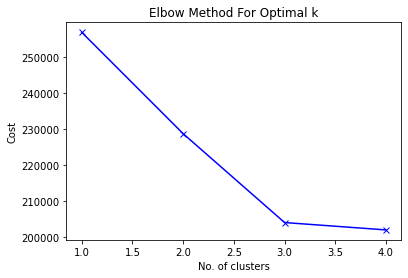

In [106]:
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(VTech8)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

We can see a bend at K=3 in the above graph indicating 3is the optimal number of clusters.

# 5 Building the model with 3 clusters

In [107]:
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters= kmode.fit_predict(VTech8)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 998, cost: 226528.0
Run 1, iteration: 2/100, moves: 0, cost: 226528.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4868, cost: 226488.0
Run 2, iteration: 2/100, moves: 174, cost: 226488.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1621, cost: 227261.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 9953, cost: 204141.0
Run 4, iteration: 2/100, moves: 8, cost: 204141.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 409, cost: 227820.0
Run 5, iteration: 2/100, moves: 16, cost: 227820.0
Best run was number 4


array([2, 1, 0, ..., 0, 2, 0], dtype=uint16)

# 6 Combining the predicted clusters with the original DF

In [108]:
VTech7.insert(0, "Cluster", clusters, True)
VTech7.head()

,Cluster,Cluster,VervotechId,HotelName,Provider,ProviderHotelId,ProviderRoomCode,ProviderRoomName,ProviderBedInfo,RoomInSquareFeet
0,2,0,1285,73,0,581,2096,630,262,23
1,1,2,1285,73,1,228,5921,630,261,24
2,0,1,1285,73,2,2747,24671,630,217,24
3,1,2,1285,73,1,228,8410,10471,41,321
4,2,0,1285,73,0,581,2102,631,68,23


In [99]:
print(kmode.cluster_centroids_)

[[ 1325   708     0  1739 17867  3868   262   770]
 [  379   675     2  3663 30972  3982   217   775]
 [   58   712     1  2193 13686  7611   261   775]]
